In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup

import re
import time

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [7]:
MovieData_df = pd.read_csv('MovieData_cleaned.csv')

In [8]:
MovieData_df

,Unnamed: 0,Id,Title,Year,Certificate,Runtime,Genre,Imdb_rating,Metascore,Director,Votes,Gross
0,0,1,12 Angry Men,1957,U,96,"Crime, Drama",9.0,97.0,Sidney Lumet,844910,4.36
1,1,2,12 Years a Slave,2013,A,134,"Biography, Drama, History",8.1,96.0,Steve McQueen,731219,56.67
2,2,3,1917,2019,A,119,"Action, Drama, War",8.2,78.0,Sam Mendes,654454,159.23
3,3,4,2001: A Space Odyssey,1968,U,149,"Adventure, Sci-Fi",8.3,84.0,Stanley Kubrick,706415,56.95
4,4,5,"4 luni, 3 saptamâni si 2 zile",2007,NaN,113,Drama,7.9,97.0,Cristian Mungiu,62763,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,496,Zelig,1983,NaN,79,Comedy,7.7,NaN,Woody Allen,43664,11.80
496,496,497,Zerkalo,1975,NaN,107,"Biography, Drama",8.0,82.0,Andrei Tarkovsky,50989,0.18
497,497,498,Zootopia,2016,U,108,"Animation, Adventure, Comedy",8.0,78.0,Byron Howard,533952,341.27
498,498,499,À bout de souffle,1960,U,90,"Crime, Drama",7.7,NaN,Jean-Luc Godard,86672,0.34


In [4]:
#EDA

In [5]:
# Uni-variate Analysis   #Continuous Variables

In [9]:
MovieData_df['Runtime'].mean()

121.658

In [10]:
MovieData_df['Runtime'].median()

116.0

In [11]:
MovieData_df.mean()

Unnamed: 0        249.500000
Id                250.500000
Year             1974.298000
Runtime           121.658000
Imdb_rating         8.110200
Metascore          86.341333
Votes          319756.782000
Gross              50.548267
dtype: float64

In [12]:
MovieData_df.median()

Unnamed: 0       249.500
Id               250.500
Year            1974.000
Runtime          116.000
Imdb_rating        8.100
Metascore         87.000
Votes          98746.500
Gross              7.815
dtype: float64

In [13]:
modes = MovieData_df[['Runtime','Imdb_rating','Metascore','Votes', 'Gross']].mode()
print(modes)

   Runtime  Imdb_rating  Metascore  Votes  Gross
0      110          8.1       86.0  13202   0.01


In [14]:
variances = MovieData_df[['Runtime','Imdb_rating','Metascore','Votes', 'Gross']].var()
print(variances)

Runtime        1.406137e+03
Imdb_rating    7.394385e-02
Metascore      8.403291e+01
Votes          2.237356e+11
Gross          8.255751e+03
dtype: float64


In [15]:
stdv = MovieData_df[['Runtime','Imdb_rating','Metascore','Votes', 'Gross']].std()
print(stdv)

Runtime            37.498497
Imdb_rating         0.271926
Metascore           9.166947
Votes          473006.973119
Gross              90.861163
dtype: float64


In [16]:
MovieData_df

,Unnamed: 0,Id,Title,Year,Certificate,Runtime,Genre,Imdb_rating,Metascore,Director,Votes,Gross
0,0,1,12 Angry Men,1957,U,96,"Crime, Drama",9.0,97.0,Sidney Lumet,844910,4.36
1,1,2,12 Years a Slave,2013,A,134,"Biography, Drama, History",8.1,96.0,Steve McQueen,731219,56.67
2,2,3,1917,2019,A,119,"Action, Drama, War",8.2,78.0,Sam Mendes,654454,159.23
3,3,4,2001: A Space Odyssey,1968,U,149,"Adventure, Sci-Fi",8.3,84.0,Stanley Kubrick,706415,56.95
4,4,5,"4 luni, 3 saptamâni si 2 zile",2007,NaN,113,Drama,7.9,97.0,Cristian Mungiu,62763,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,496,Zelig,1983,NaN,79,Comedy,7.7,NaN,Woody Allen,43664,11.80
496,496,497,Zerkalo,1975,NaN,107,"Biography, Drama",8.0,82.0,Andrei Tarkovsky,50989,0.18
497,497,498,Zootopia,2016,U,108,"Animation, Adventure, Comedy",8.0,78.0,Byron Howard,533952,341.27
498,498,499,À bout de souffle,1960,U,90,"Crime, Drama",7.7,NaN,Jean-Luc Godard,86672,0.34


<Axes: >

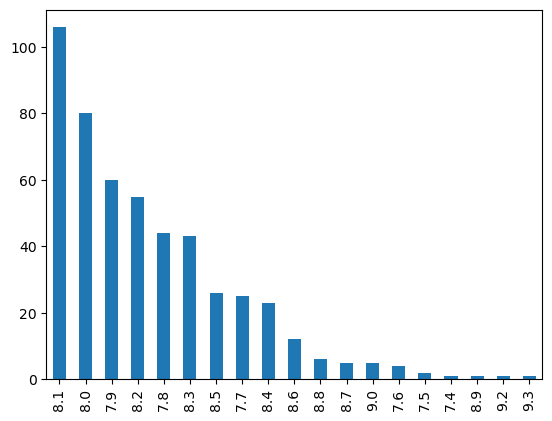

In [26]:
MovieData_df.Imdb_rating.value_counts().plot.bar()

In [ ]:
#box-plot

<Axes: >

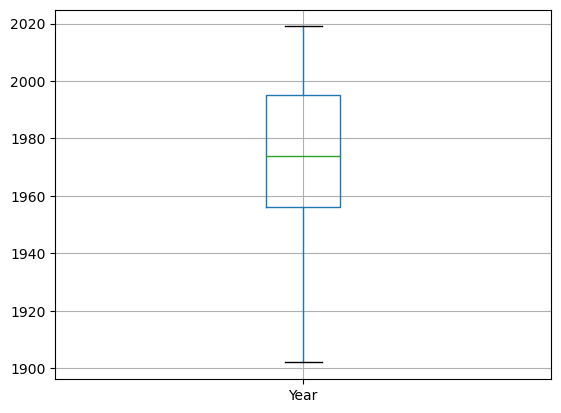

In [27]:
MovieData_df.boxplot(column='Year')

<Axes: >

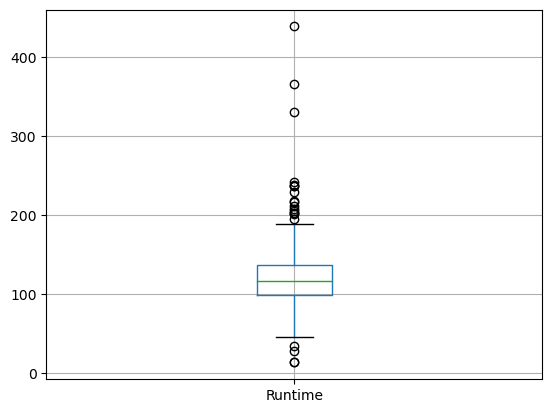

In [28]:
MovieData_df.boxplot(column='Runtime')

<Axes: >

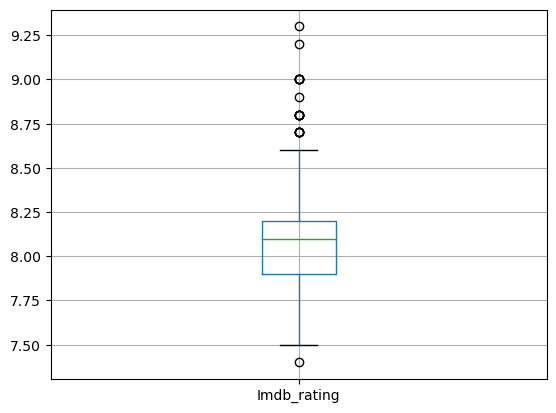

In [29]:
MovieData_df.boxplot(column='Imdb_rating')

<Axes: >

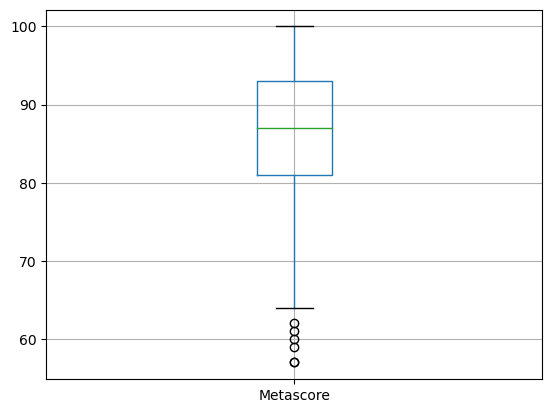

In [31]:
MovieData_df.boxplot(column='Metascore')

<Axes: >

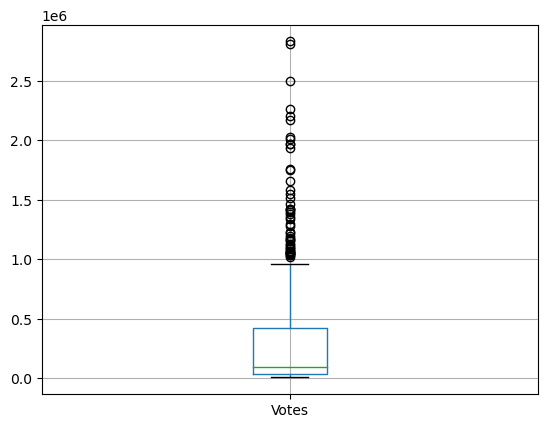

In [32]:
MovieData_df.boxplot(column='Votes')

<Axes: >

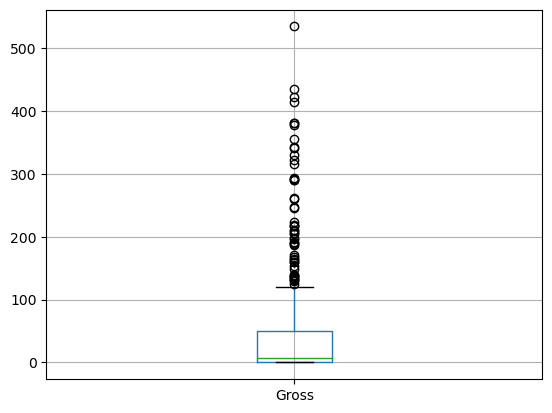

In [33]:
MovieData_df.boxplot(column='Gross')

<Axes: >

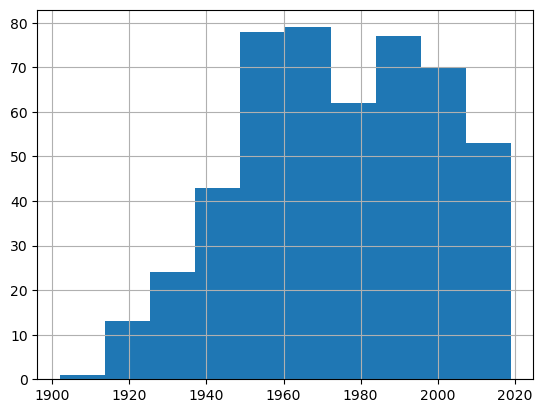

In [35]:
MovieData_df.Year.hist()

<Axes: xlabel='Year', ylabel='Density'>

Text(0.5, 1.0, 'Histogram of Year')

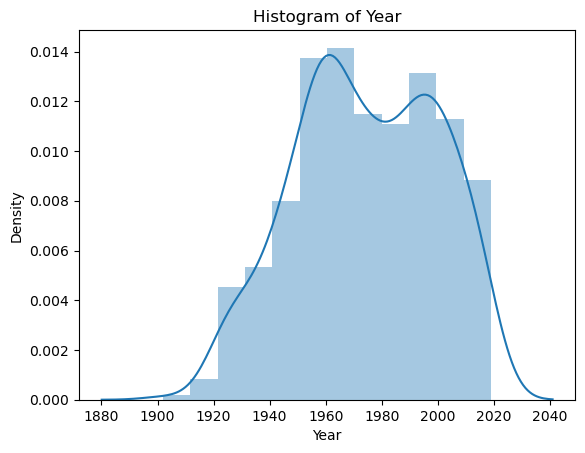

In [39]:
sns.distplot(MovieData_df.Year,kde=True)
plt.title('Histogram of Year')
plt.show()

<Axes: xlabel='Runtime', ylabel='Density'>

Text(0.5, 1.0, 'Histogram of Runtime')

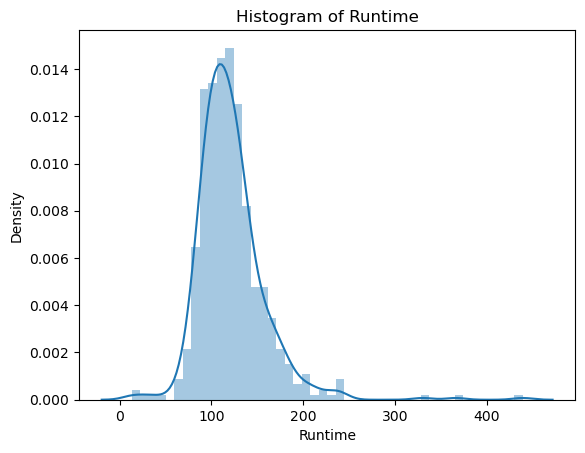

In [40]:
sns.distplot(MovieData_df.Runtime,kde=True)
plt.title('Histogram of Runtime')
plt.show()

<Axes: xlabel='Imdb_rating', ylabel='Density'>

Text(0.5, 1.0, 'Histogram of Imdb_rating')

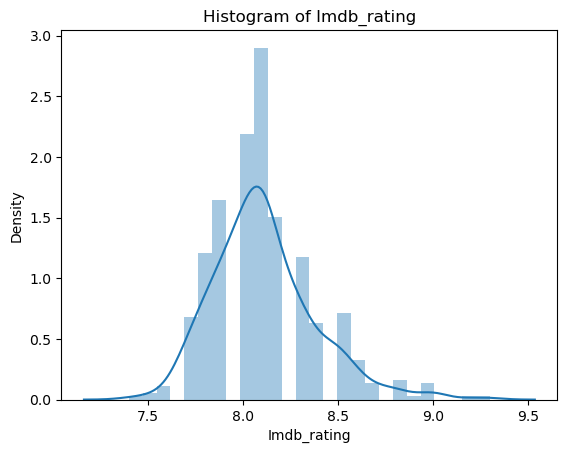

In [41]:
sns.distplot(MovieData_df.Imdb_rating,kde=True)
plt.title('Histogram of Imdb_rating')
plt.show()

<Axes: xlabel='Metascore', ylabel='Density'>

Text(0.5, 1.0, 'Histogram of Metascore')

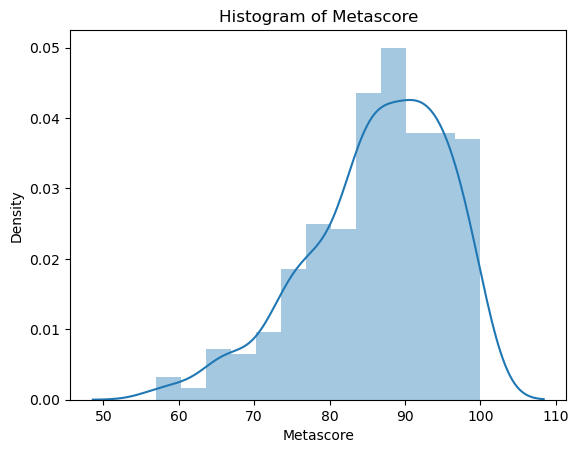

In [42]:
sns.distplot(MovieData_df.Metascore,kde=True)
plt.title('Histogram of Metascore')
plt.show()

<Axes: xlabel='Votes', ylabel='Density'>

Text(0.5, 1.0, 'Histogram of Votes')

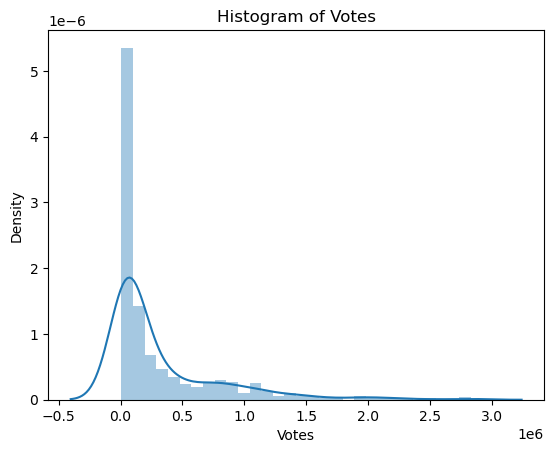

In [43]:
sns.distplot(MovieData_df.Votes,kde=True)
plt.title('Histogram of Votes')
plt.show()

<Axes: xlabel='Gross', ylabel='Density'>

Text(0.5, 1.0, 'Histogram of Gross')

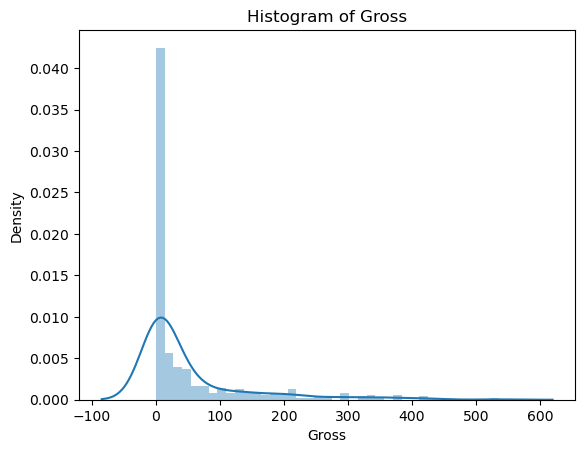

In [44]:
sns.distplot(MovieData_df.Gross,kde=True)
plt.title('Histogram of Gross')
plt.show()

<Axes: >

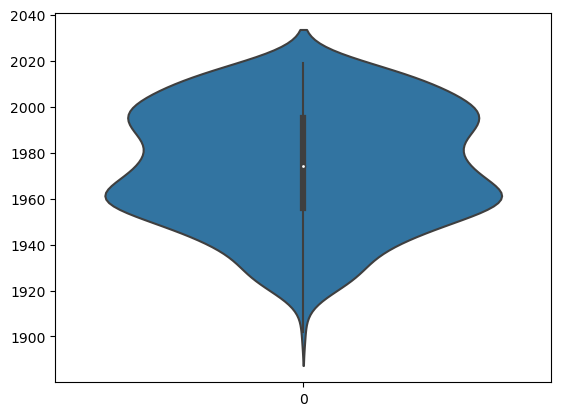

In [45]:
sns.violinplot(MovieData_df.Year)

<Axes: >

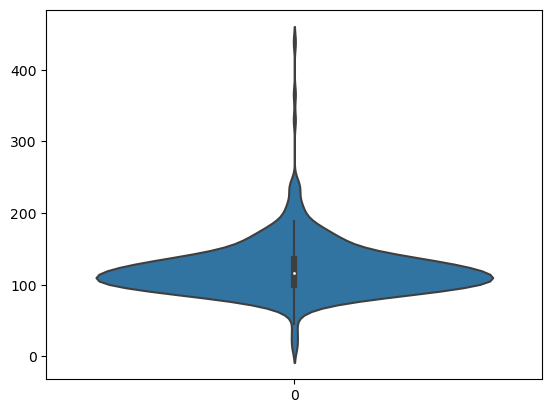

In [47]:
sns.violinplot(MovieData_df.Runtime)

<Axes: >

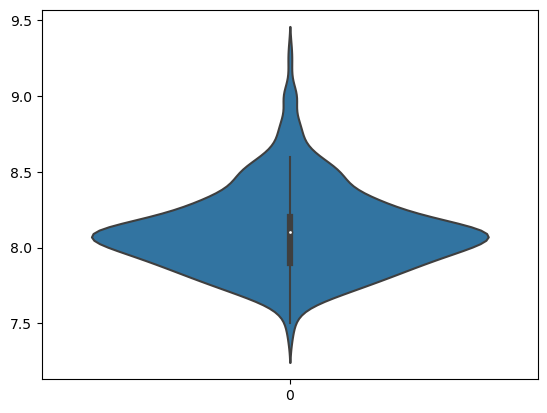

In [48]:
sns.violinplot(MovieData_df.Imdb_rating)

<Axes: >

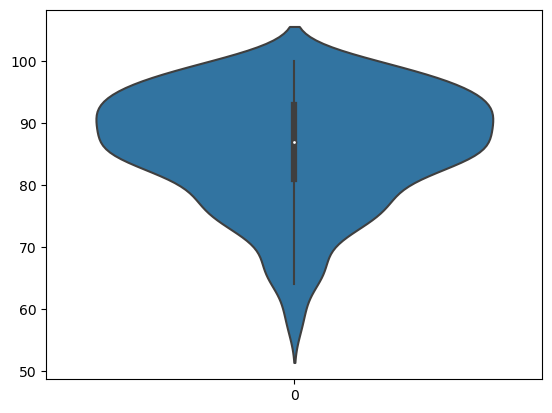

In [49]:
sns.violinplot(MovieData_df.Metascore)

<Axes: >

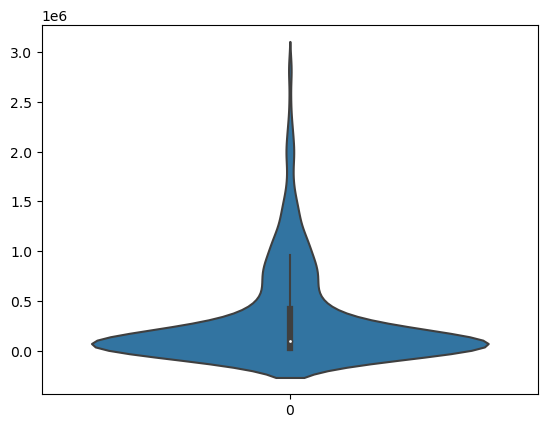

In [50]:
sns.violinplot(MovieData_df.Votes)

<Axes: >

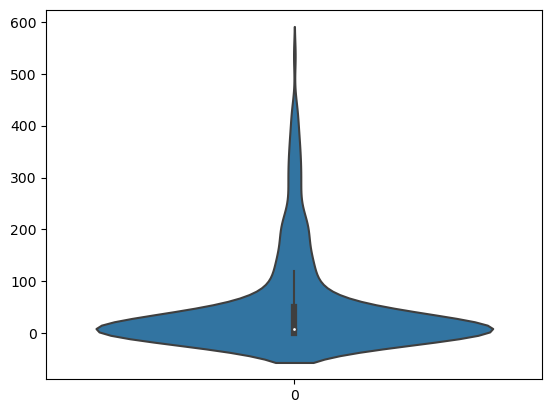

In [51]:
sns.violinplot(MovieData_df.Gross)

In [ ]:
# Uni-variate Analysis   Categorical Variables

In [74]:
MovieData_df

,Unnamed: 0,Id,Title,Year,Certificate,Runtime,Genre,Imdb_rating,Metascore,Director,Votes,Gross
0,0,1,12 Angry Men,1957,U,96,"Crime, Drama",9.0,97.0,Sidney Lumet,844910,4.36
1,1,2,12 Years a Slave,2013,A,134,"Biography, Drama, History",8.1,96.0,Steve McQueen,731219,56.67
2,2,3,1917,2019,A,119,"Action, Drama, War",8.2,78.0,Sam Mendes,654454,159.23
3,3,4,2001: A Space Odyssey,1968,U,149,"Adventure, Sci-Fi",8.3,84.0,Stanley Kubrick,706415,56.95
4,4,5,"4 luni, 3 saptamâni si 2 zile",2007,NaN,113,Drama,7.9,97.0,Cristian Mungiu,62763,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,496,Zelig,1983,NaN,79,Comedy,7.7,NaN,Woody Allen,43664,11.80
496,496,497,Zerkalo,1975,NaN,107,"Biography, Drama",8.0,82.0,Andrei Tarkovsky,50989,0.18
497,497,498,Zootopia,2016,U,108,"Animation, Adventure, Comedy",8.0,78.0,Byron Howard,533952,341.27
498,498,499,À bout de souffle,1960,U,90,"Crime, Drama",7.7,NaN,Jean-Luc Godard,86672,0.34


In [17]:
MovieData_df.Certificate.value_counts()

U            140
A            113
UA            52
Not Rated      4
Name: Certificate, dtype: int64

In [18]:
MovieData_df.Certificate.isnull().sum(axis=0)

191

In [19]:
MovieData_df['Certificate'] = MovieData_df['Certificate'].replace(['R','18'],'A')

In [20]:
MovieData_df['Certificate'] = MovieData_df['Certificate'].replace(['G','7'],'U')

In [21]:
MovieData_df['Certificate'] = MovieData_df['Certificate'].replace(['PG','PG-13','M/PG','12+','13','15+','16'],'UA')

In [22]:
MovieData_df.Certificate.value_counts()

U            140
A            113
UA            52
Not Rated      4
Name: Certificate, dtype: int64

In [23]:
MovieData_df.Certificate.isnull().replace('NaN','Null').sum(axis=0)

191

In [24]:
MovieData_df.Certificate.value_counts()

U            140
A            113
UA            52
Not Rated      4
Name: Certificate, dtype: int64

<Axes: >

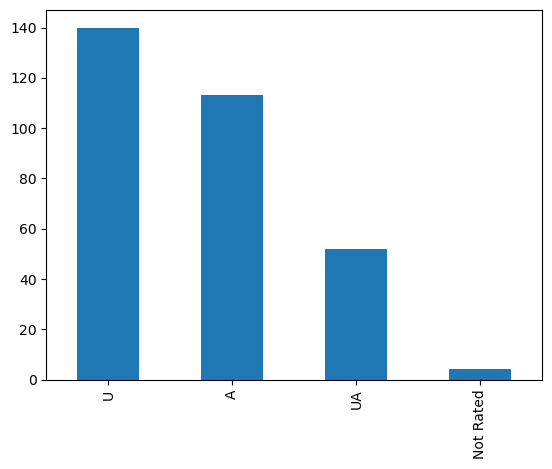

In [25]:
MovieData_df.Certificate.value_counts().plot.bar()

<Figure size 500x500 with 0 Axes>

<Axes: xlabel='Certificate', ylabel='count'>

(array([0, 1, 2, 3]),
 [Text(0, 0, 'U'), Text(1, 0, 'A'), Text(2, 0, 'UA'), Text(3, 0, 'Not Rated')])

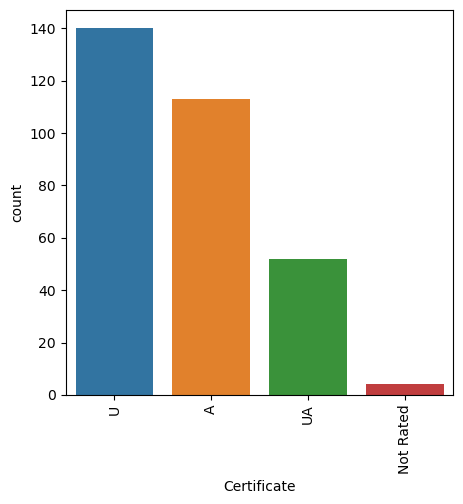

In [62]:
plt.figure(figsize=(5,5))
sns.countplot(x='Certificate',data=MovieData_df)
plt.xticks(rotation=90)
plt.show()

In [54]:
MovieData_df['Director'].value_counts()

Akira Kurosawa      12
Ingmar Bergman      10
Alfred Hitchcock    10
Stanley Kubrick      8
Charles Chaplin      8
                    ..
Denis Villeneuve     1
Steve McQueen        1
Olivier Nakache      1
Don Hertzfeldt       1
Mamoru Hosoda        1
Name: Director, Length: 266, dtype: int64

<Figure size 5000x500 with 0 Axes>

<Axes: xlabel='Director', ylabel='count'>

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

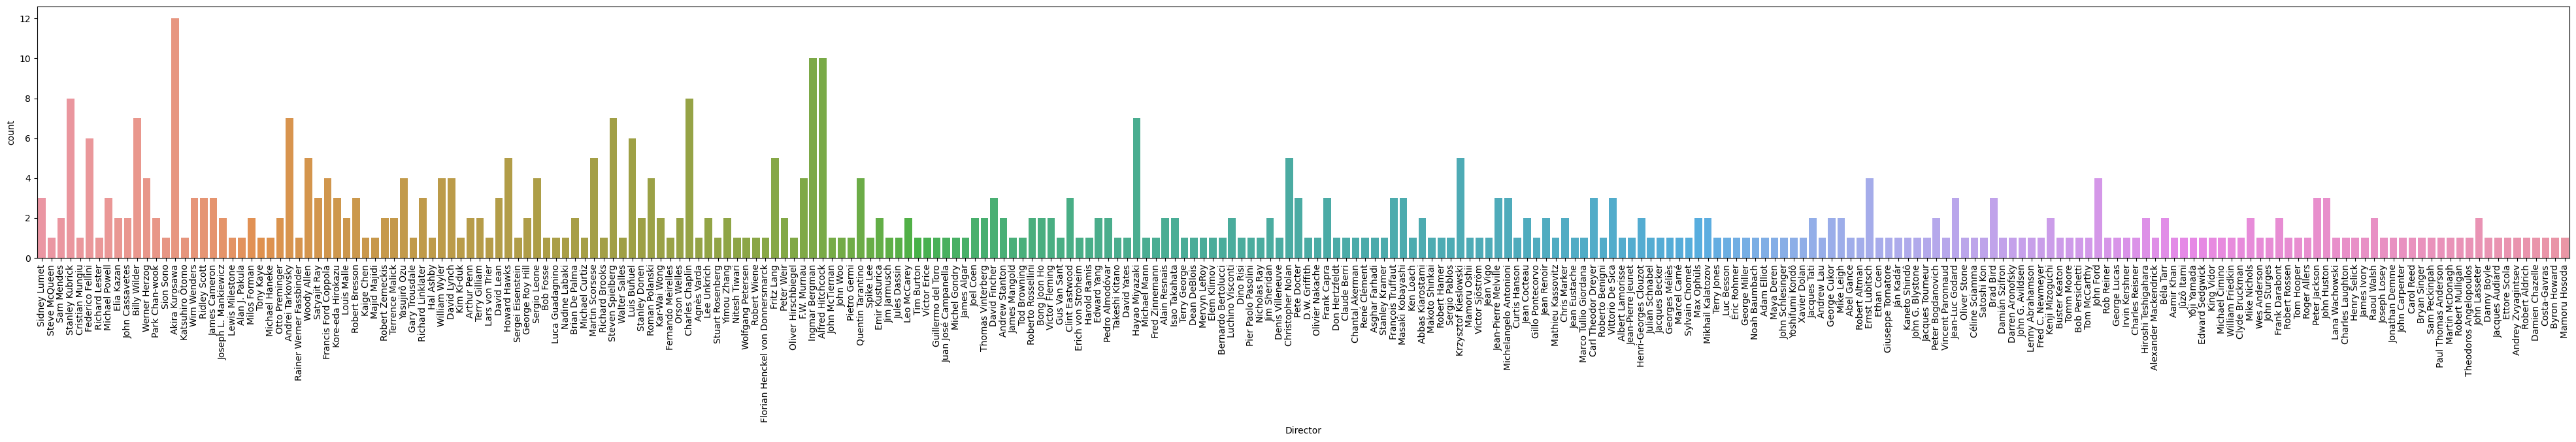

In [60]:
plt.figure(figsize=(50,5))
sns.countplot(x='Director',data=MovieData_df)
plt.xticks(rotation=90)
plt.show()

In [138]:
director_counts = MovieData_df['Director'].value_counts()
director_counts

Akira Kurosawa      12
Ingmar Bergman      10
Alfred Hitchcock    10
Stanley Kubrick      8
Charles Chaplin      8
                    ..
Denis Villeneuve     1
Steve McQueen        1
Olivier Nakache      1
Don Hertzfeldt       1
Mamoru Hosoda        1
Name: Director, Length: 266, dtype: int64

Akira Kurosawa      12
Ingmar Bergman      10
Alfred Hitchcock    10
Stanley Kubrick      8
Charles Chaplin      8
Steven Spielberg     7
Billy Wilder         7
Hayao Miyazaki       7
Andrei Tarkovsky     7
Federico Fellini     6
Name: Director, dtype: int64

<Axes: >

Text(0, 0.5, 'Director')

Text(0.5, 0, 'Number of movies')

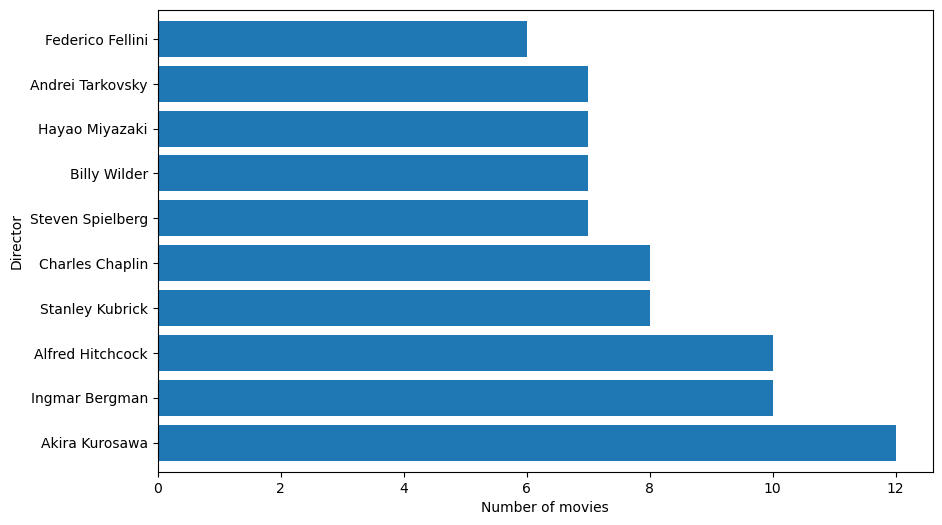

In [147]:
top_directors = director_counts.nlargest(10)
top_directors
fig = plt.subplots(figsize=(10, 6))
top_directors.plot(kind='barh', width=0.8)
plt.ylabel('Director')
plt.xlabel('Number of movies')

<Figure size 5000x500 with 0 Axes>

<Axes: xlabel='Genre', ylabel='count'>

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144]),
 [Text(0, 0, 'Crime, Drama'),
  Text(1, 0, 'Biography, Drama, History'),
  Text(2, 0, 'Action, Drama, War'),
  Text(3, 0, 'Adventure, Sci-Fi'),
  Text(4, 0, 'Drama'),
  Text(5, 

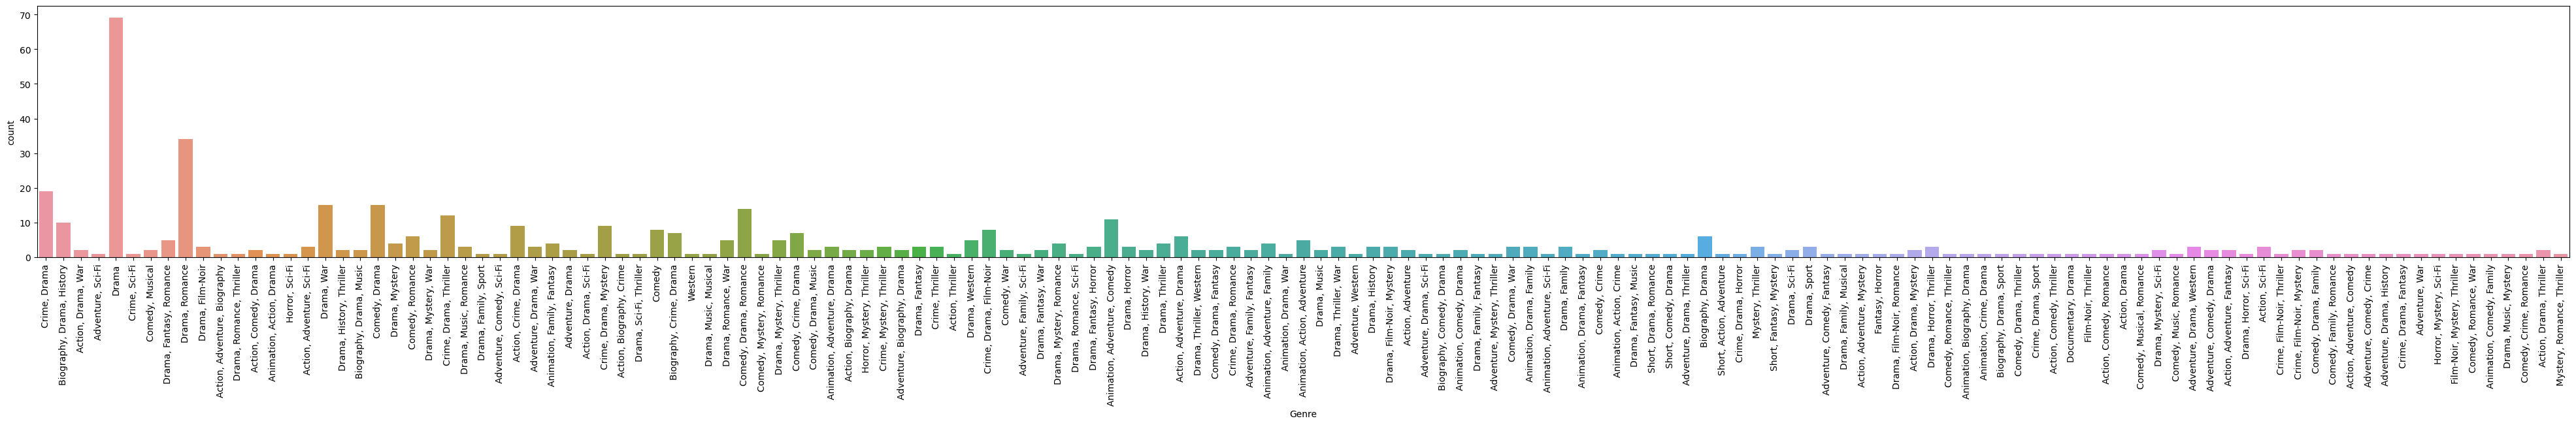

In [67]:
plt.figure(figsize=(50,5))
sns.countplot(x='Genre',data=MovieData_df)
plt.xticks(rotation=90)
plt.show()

In [135]:
genre_counts = MovieData_df['Genre'].value_counts()
genre_counts

Drama                           69
Drama, Romance                  34
Crime, Drama                    19
Comedy, Drama                   15
Drama, War                      15
                                ..
Animation, Drama, Fantasy        1
Animation, Adventure, Sci-Fi     1
Drama, Family, Fantasy           1
Biography, Comedy, Drama         1
Mystery, Romance, Thriller       1
Name: Genre, Length: 145, dtype: int64

Drama                           69
Drama, Romance                  34
Crime, Drama                    19
Comedy, Drama                   15
Drama, War                      15
Comedy, Drama, Romance          14
Crime, Drama, Thriller          12
Animation, Adventure, Comedy    11
Biography, Drama, History       10
Crime, Drama, Mystery            9
Name: Genre, dtype: int64

<Axes: >

Text(0, 0.5, 'Type of genre')

Text(0.5, 0, 'Number of movies')

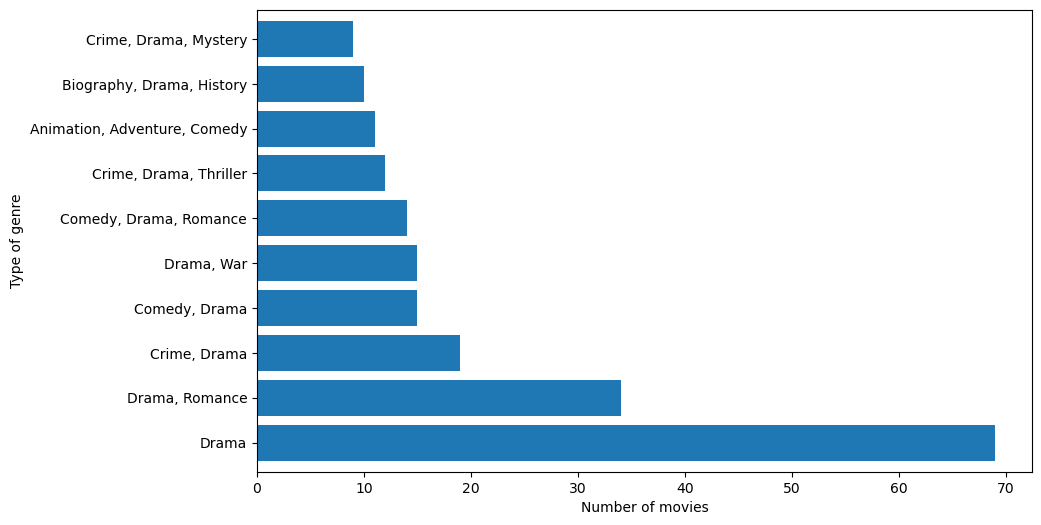

In [140]:
top_genres = genre_counts.nlargest(10)
top_genres
fig, ax = plt.subplots(figsize=(10, 6))
top_genres.plot(kind='barh', ax=ax, width=0.8)
plt.ylabel('Type of genre')
plt.xlabel('Number of movies')

<Axes: xlabel='Imdb_rating'>

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8'),
  Text(9.0, 0, '9')])

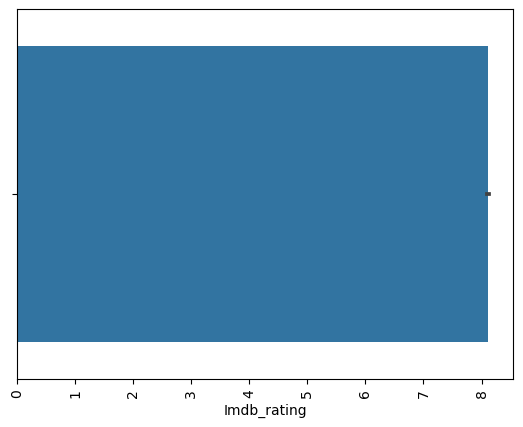

In [75]:
sns.barplot(data=MovieData_df, x='Imdb_rating')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Metascore'>

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100')])

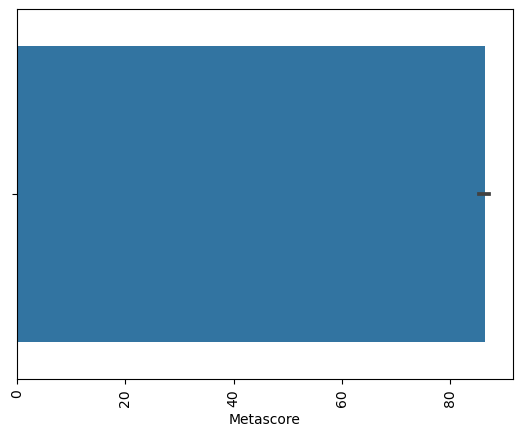

In [76]:
sns.barplot(data=MovieData_df, x='Metascore')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Votes'>

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000., 400000.]),
 [Text(0.0, 0, '0'),
  Text(50000.0, 0, '50000'),
  Text(100000.0, 0, '100000'),
  Text(150000.0, 0, '150000'),
  Text(200000.0, 0, '200000'),
  Text(250000.0, 0, '250000'),
  Text(300000.0, 0, '300000'),
  Text(350000.0, 0, '350000'),
  Text(400000.0, 0, '400000')])

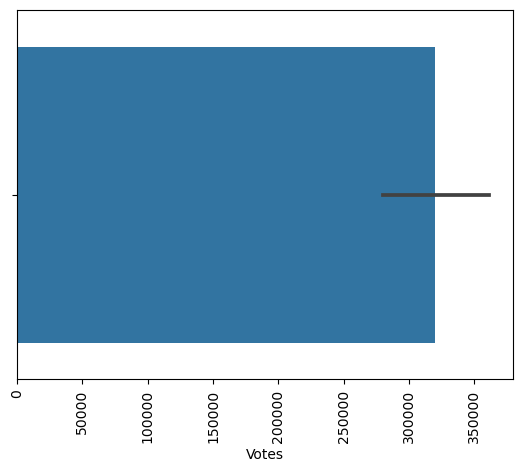

In [72]:
sns.barplot(data=MovieData_df, x='Votes')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Gross'>

(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 [Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70')])

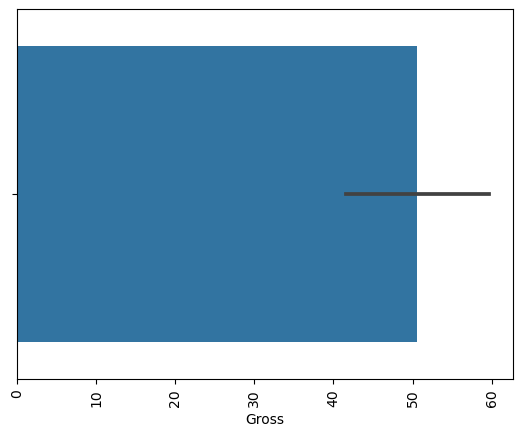

In [73]:
sns.barplot(data=MovieData_df, x='Gross')
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='Certificate'>

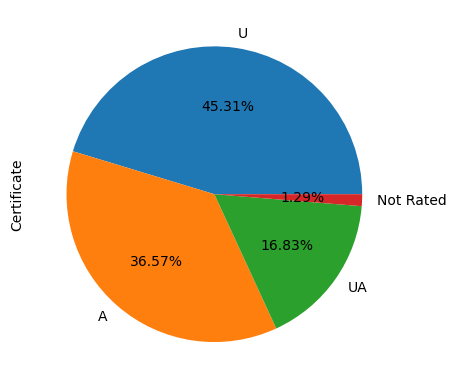

In [79]:
MovieData_df.Certificate.value_counts().plot.pie(autopct="%.2f%%")

<Axes: ylabel='Imdb_rating'>

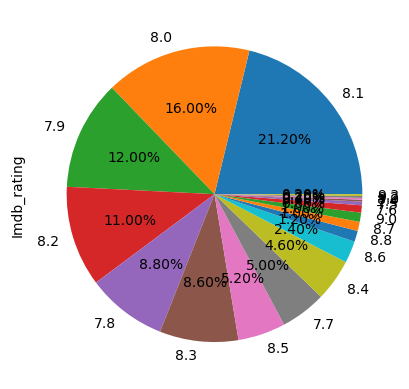

In [85]:
MovieData_df.Imdb_rating.value_counts().plot.pie(autopct="%.2f%%")

In [ ]:
#Bi-variate Analysis    #Continuous  and Categorical variables

In [91]:
MovieData_df.groupby(['Year']).count()

,Unnamed: 0,Id,Title,Certificate,Runtime,Genre,Imdb_rating,Metascore,Director,Votes,Gross
Year,,,,,,,,,,,
1902,1,1,1,0,1,1,1,0,1,1,0
1916,1,1,1,0,1,1,1,1,1,1,1
1920,1,1,1,0,1,1,1,0,1,1,0
1921,2,2,2,0,2,2,2,0,2,2,1
1922,2,2,2,0,2,2,2,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...
2015,4,4,4,4,4,4,4,4,4,4,4
2016,4,4,4,4,4,4,4,3,4,4,4
2017,3,3,3,3,3,3,3,3,3,3,3


In [93]:
MovieData_df.groupby(['Certificate']).count()

,Unnamed: 0,Id,Title,Year,Runtime,Genre,Imdb_rating,Metascore,Director,Votes,Gross
Certificate,,,,,,,,,,,
A,113,113,113,113,113,113,113,109,113,113,103
Not Rated,4,4,4,4,4,4,4,2,4,4,3
U,140,140,140,140,140,140,140,122,140,140,110
UA,52,52,52,52,52,52,52,49,52,52,45


In [94]:
MovieData_df.groupby(['Runtime']).count()

,Unnamed: 0,Id,Title,Year,Certificate,Genre,Imdb_rating,Metascore,Director,Votes,Gross
Runtime,,,,,,,,,,,
13,1,1,1,1,0,1,1,0,1,1,0
14,1,1,1,1,0,1,1,0,1,1,0
28,1,1,1,1,0,1,1,0,1,1,0
34,1,1,1,1,0,1,1,0,1,1,0
45,1,1,1,1,0,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
238,1,1,1,1,1,1,1,1,1,1,1
242,1,1,1,1,0,1,1,0,1,1,0
330,1,1,1,1,0,1,1,0,1,1,0


In [95]:
MovieData_df.groupby(['Genre']).count()

,Unnamed: 0,Id,Title,Year,Certificate,Runtime,Imdb_rating,Metascore,Director,Votes,Gross
Genre,,,,,,,,,,,
"Action, Adventure",2,2,2,2,2,2,2,2,2,2,2
"Action, Adventure, Biography",1,1,1,1,0,1,1,0,1,1,0
"Action, Adventure, Comedy",1,1,1,1,0,1,1,0,1,1,1
"Action, Adventure, Drama",6,6,6,6,5,6,6,6,6,6,5
"Action, Adventure, Fantasy",2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
"Short, Action, Adventure",1,1,1,1,0,1,1,0,1,1,0
"Short, Comedy, Drama",1,1,1,1,0,1,1,0,1,1,0
"Short, Drama, Romance",1,1,1,1,0,1,1,0,1,1,0


In [96]:
MovieData_df.groupby(['Imdb_rating']).count()

,Unnamed: 0,Id,Title,Year,Certificate,Runtime,Genre,Metascore,Director,Votes,Gross
Imdb_rating,,,,,,,,,,,
7.4,1,1,1,1,0,1,1,0,1,1,0
7.5,2,2,2,2,1,2,2,2,2,2,2
7.6,4,4,4,4,0,4,4,2,4,4,1
7.7,25,25,25,25,10,25,25,16,25,25,13
7.8,44,44,44,44,14,44,44,30,44,44,24
7.9,60,60,60,60,28,60,60,42,60,60,38
8.0,80,80,80,80,49,80,80,54,80,80,52
8.1,106,106,106,106,66,106,106,81,106,106,79
8.2,55,55,55,55,35,55,55,39,55,55,36


In [97]:
MovieData_df.groupby(['Metascore']).count()

,Unnamed: 0,Id,Title,Year,Certificate,Runtime,Genre,Imdb_rating,Director,Votes,Gross
Metascore,,,,,,,,,,,
57.0,2,2,2,2,2,2,2,2,2,2,2
59.0,1,1,1,1,1,1,1,1,1,1,1
60.0,1,1,1,1,1,1,1,1,1,1,0
61.0,1,1,1,1,1,1,1,1,1,1,1
62.0,1,1,1,1,1,1,1,1,1,1,1
64.0,1,1,1,1,1,1,1,1,1,1,1
65.0,4,4,4,4,4,4,4,4,4,4,3
66.0,4,4,4,4,4,4,4,4,4,4,4
67.0,4,4,4,4,4,4,4,4,4,4,4


In [98]:
MovieData_df.groupby(['Director']).count()

,Unnamed: 0,Id,Title,Year,Certificate,Runtime,Genre,Imdb_rating,Metascore,Votes,Gross
Director,,,,,,,,,,,
Aamir Khan,1,1,1,1,1,1,1,1,0,1,1
Abbas Kiarostami,2,2,2,2,0,2,2,2,1,2,1
Abel Gance,1,1,1,1,0,1,1,1,0,1,0
Adam Elliot,1,1,1,1,1,1,1,1,0,1,0
Agnès Varda,1,1,1,1,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
Yasujirô Ozu,4,4,4,4,1,4,4,4,4,4,0
Yimou Zhang,2,2,2,2,0,2,2,2,0,2,2
Yoshifumi Kondô,1,1,1,1,1,1,1,1,1,1,0


In [99]:
MovieData_df.groupby(['Votes']).count()

,Unnamed: 0,Id,Title,Year,Certificate,Runtime,Genre,Imdb_rating,Metascore,Director,Gross
Votes,,,,,,,,,,,
6493,1,1,1,1,0,1,1,1,1,1,0
7995,1,1,1,1,0,1,1,1,0,1,0
8359,1,1,1,1,1,1,1,1,0,1,1
8570,1,1,1,1,0,1,1,1,0,1,0
8969,1,1,1,1,0,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2207102,1,1,1,1,1,1,1,1,1,1,1
2267753,1,1,1,1,1,1,1,1,1,1,1
2497653,1,1,1,1,1,1,1,1,1,1,1


In [100]:
MovieData_df.groupby(['Gross']).count()

,Unnamed: 0,Id,Title,Year,Certificate,Runtime,Genre,Imdb_rating,Metascore,Director,Votes
Gross,,,,,,,,,,,
0.00,1,1,1,1,0,1,1,1,1,1,1
0.01,7,7,7,7,2,7,7,7,3,7,7
0.02,6,6,6,6,3,6,6,6,3,6,6
0.03,4,4,4,4,0,4,4,4,1,4,4
0.04,4,4,4,4,0,4,4,4,2,4,4
...,...,...,...,...,...,...,...,...,...,...,...
381.01,1,1,1,1,1,1,1,1,1,1,1
415.00,1,1,1,1,1,1,1,1,1,1,1
422.78,1,1,1,1,1,1,1,1,1,1,1


In [107]:
pd.pivot_table(MovieData_df, index = ["Year"])

,Gross,Id,Imdb_rating,Metascore,Runtime,Unnamed: 0,Votes
Year,,,,,,,
1902,NaN,239.000000,8.200000,NaN,13.000000,238.000000,54428.000000
1916,2.180000,173.000000,7.700000,99.000000,163.000000,172.000000,16502.000000
1920,NaN,87.000000,8.000000,NaN,76.000000,86.000000,68788.000000
1921,5.450000,310.500000,8.100000,NaN,87.500000,309.500000,73277.000000
1922,NaN,197.500000,7.850000,NaN,168.000000,196.500000,56384.500000
...,...,...,...,...,...,...,...
2015,142.565000,280.750000,8.100000,90.750000,115.500000,279.750000,691600.750000
2016,90.172500,198.250000,8.200000,81.333333,130.000000,197.250000,303033.250000
2017,94.113333,200.666667,8.100000,87.666667,117.333333,199.666667,471589.000000


In [108]:
pd.pivot_table(MovieData_df, index = ["Certificate"])

,Gross,Id,Imdb_rating,Metascore,Runtime,Unnamed: 0,Votes,Year
Certificate,,,,,,,,
A,46.109515,235.407080,8.224779,84.055046,132.123894,234.407080,581135.619469,1987.265487
Not Rated,1.666667,213.000000,8.050000,82.000000,121.250000,212.000000,136507.000000,1983.000000
U,80.644636,262.442857,8.144286,86.844262,121.085714,261.442857,360031.335714,1979.535714
UA,85.664444,221.403846,8.217308,83.428571,127.000000,220.403846,666341.480769,1994.057692


In [109]:
pd.pivot_table(MovieData_df, index = ["Runtime"])

,Gross,Id,Imdb_rating,Metascore,Unnamed: 0,Votes,Year
Runtime,,,,,,,
13,NaN,239.0,8.2,NaN,238.0,54428.0,1902.0
14,NaN,262.0,7.8,NaN,261.0,14856.0,1943.0
28,NaN,217.0,8.2,NaN,216.0,36465.0,1962.0
34,NaN,230.0,8.1,NaN,229.0,19742.0,1956.0
45,0.98,354.0,8.2,NaN,353.0,55216.0,1924.0
...,...,...,...,...,...,...,...
238,198.68,135.0,8.2,97.0,134.0,329292.0,1939.0
242,NaN,107.0,7.8,NaN,106.0,9042.0,1922.0
330,NaN,280.0,8.2,NaN,279.0,8570.0,1927.0


In [110]:
pd.pivot_table(MovieData_df, index = ["Genre"])

,Gross,Id,Imdb_rating,Metascore,Runtime,Unnamed: 0,Votes,Year
Genre,,,,,,,,
"Action, Adventure",222.665,244.500000,8.300000,75.500000,121.000000,243.500000,9.105065e+05,1985.000000
"Action, Adventure, Biography",NaN,13.000000,7.800000,NaN,95.000000,12.000000,6.105600e+04,1972.000000
"Action, Adventure, Comedy",1.030,403.000000,8.100000,NaN,78.000000,402.000000,9.659900e+04,1926.000000
"Action, Adventure, Drama",247.142,341.833333,8.516667,87.833333,166.166667,340.833333,1.228261e+06,1988.833333
"Action, Adventure, Fantasy",306.610,369.500000,8.650000,86.000000,122.500000,368.500000,1.391464e+06,1978.500000
...,...,...,...,...,...,...,...,...
"Short, Action, Adventure",NaN,239.000000,8.200000,NaN,13.000000,238.000000,5.442800e+04,1902.000000
"Short, Comedy, Drama",NaN,230.000000,8.100000,NaN,34.000000,229.000000,1.974200e+04,1956.000000
"Short, Drama, Romance",NaN,217.000000,8.200000,NaN,28.000000,216.000000,3.646500e+04,1962.000000


In [111]:
pd.pivot_table(MovieData_df, index = ["Imdb_rating"])

,Gross,Id,Metascore,Runtime,Unnamed: 0,Votes,Year
Imdb_rating,,,,,,,
7.4,NaN,312.000000,NaN,110.000000,311.000000,3.638900e+04,1965.000000
7.5,6.900000,95.000000,95.000000,144.500000,94.000000,3.034350e+04,1969.500000
7.6,14.820000,270.750000,93.500000,119.500000,269.750000,3.067500e+04,1965.750000
7.7,15.339231,225.880000,89.187500,108.800000,224.880000,5.830820e+04,1966.320000
7.8,10.505000,236.318182,88.400000,109.931818,235.318182,5.738064e+04,1966.636364
7.9,29.071053,230.366667,87.833333,115.666667,229.366667,1.040317e+05,1970.816667
8.0,29.574231,251.612500,86.000000,113.425000,250.612500,1.137872e+05,1971.387500
8.1,47.991772,265.745283,86.543210,119.264151,264.745283,2.634421e+05,1975.745283
8.2,45.438889,258.654545,85.948718,128.363636,257.654545,2.748320e+05,1971.927273


In [112]:
pd.pivot_table(MovieData_df, index = ["Metascore"])

,Gross,Id,Imdb_rating,Runtime,Unnamed: 0,Votes,Year
Metascore,,,,,,,
57.0,13.480000,311.000000,8.350000,110.500000,310.000000,6.830540e+05,1996.500000
59.0,57.600000,225.000000,8.600000,116.000000,224.000000,7.304290e+05,1997.000000
60.0,NaN,186.000000,8.300000,179.000000,185.000000,8.307700e+04,1961.000000
61.0,136.800000,412.000000,8.600000,189.000000,411.000000,1.378262e+06,1999.000000
62.0,6.720000,27.000000,8.500000,119.000000,26.000000,1.169380e+06,1998.000000
64.0,19.500000,250.000000,8.500000,110.000000,249.000000,1.222609e+06,1994.000000
65.0,114.300000,265.250000,8.325000,130.000000,264.250000,9.082045e+05,1996.500000
66.0,59.092500,251.500000,8.200000,132.500000,250.500000,7.381778e+05,1987.000000
67.0,56.517500,148.000000,8.325000,124.750000,147.000000,1.035919e+06,1996.000000


In [113]:
pd.pivot_table(MovieData_df, index = ["Director"])

,Gross,Id,Imdb_rating,Metascore,Runtime,Unnamed: 0,Votes,Year
Director,,,,,,,,
Aamir Khan,1.220,380.0,8.30,NaN,162.0,379.0,203412.0,2007.00
Abbas Kiarostami,0.000,239.5,8.15,92.0,90.5,238.5,20001.5,1988.50
Abel Gance,NaN,280.0,8.20,NaN,330.0,279.0,8570.0,1927.00
Adam Elliot,NaN,260.0,8.10,NaN,92.0,259.0,184531.0,2009.00
Agnès Varda,NaN,80.0,7.80,87.0,90.0,79.0,26199.0,1962.00
...,...,...,...,...,...,...,...,...
Yasujirô Ozu,NaN,225.0,8.10,94.5,120.5,224.0,26306.5,1953.75
Yimou Zhang,2.465,118.5,8.20,NaN,129.0,117.5,27404.5,1992.50
Yoshifumi Kondô,NaN,266.0,7.80,75.0,111.0,265.0,69999.0,1995.00


In [114]:
pd.pivot_table(MovieData_df, index = ["Votes"])

,Gross,Id,Imdb_rating,Metascore,Runtime,Unnamed: 0,Year
Votes,,,,,,,
6493,NaN,218.0,7.8,89.0,217,217.0,1973.0
7995,NaN,348.0,8.0,NaN,87,347.0,1946.0
8359,0.68,346.0,8.3,NaN,169,345.0,1974.0
8570,NaN,280.0,8.2,NaN,330,279.0,1927.0
8969,NaN,397.0,8.1,NaN,98,396.0,1928.0
...,...,...,...,...,...,...,...
2207102,330.25,128.0,8.8,82.0,142,127.0,1994.0
2267753,37.03,124.0,8.8,67.0,139,123.0,1999.0
2497653,292.58,168.0,8.8,74.0,148,167.0,2010.0


In [115]:
pd.pivot_table(MovieData_df, index = ["Gross"])

,Id,Imdb_rating,Metascore,Runtime,Unnamed: 0,Votes,Year
Gross,,,,,,,
0.00,283.000000,8.200000,92.0,98.000000,282.000000,2.227200e+04,1990.000000
0.01,233.714286,8.057143,85.0,112.142857,232.714286,8.790329e+04,1967.000000
0.02,164.000000,8.150000,97.0,119.166667,163.000000,5.426717e+04,1953.833333
0.03,329.250000,8.150000,92.0,124.250000,328.250000,5.330275e+04,1968.500000
0.04,231.750000,7.900000,96.0,109.500000,230.750000,2.876000e+04,1964.250000
...,...,...,...,...,...,...,...
381.01,145.000000,8.100000,85.0,130.000000,144.000000,9.289450e+05,2011.000000
415.00,465.000000,8.300000,92.0,103.000000,464.000000,8.783160e+05,2010.000000
422.78,422.000000,8.500000,88.0,88.000000,421.000000,1.119428e+06,1994.000000


In [ ]:
#Bi-variate Analysis     #Continuous  to Continuous variable

In [116]:
MovieData_df.Year.corr(MovieData_df.Runtime)

0.1903149512329705

In [118]:
MovieData_df.Year.corr(MovieData_df.Imdb_rating)

0.21655057642683784

In [119]:
MovieData_df.Year.corr(MovieData_df.Metascore)

-0.36229554909527545

In [120]:
MovieData_df.Year.corr(MovieData_df.Votes)

0.4457129956661352

In [121]:
MovieData_df.Year.corr(MovieData_df.Gross)

0.33534611483561716

In [123]:
MovieData_df.Runtime.corr(MovieData_df.Imdb_rating)

0.2587045278631156

In [124]:
MovieData_df.Runtime.corr(MovieData_df.Metascore)

-0.0011218694930319926

In [125]:
MovieData_df.Runtime.corr(MovieData_df.Votes)

0.16058555902793892

In [126]:
MovieData_df.Runtime.corr(MovieData_df.Gross)

0.09993058294372187

In [127]:
MovieData_df.Imdb_rating.corr(MovieData_df.Metascore)

-0.12994773325256356

In [128]:
MovieData_df.Imdb_rating.corr(MovieData_df.Votes)

0.7025289403010185

In [129]:
MovieData_df.Imdb_rating.corr(MovieData_df.Gross)

0.36118388716987393

In [130]:
MovieData_df.Metascore.corr(MovieData_df.Votes)

-0.25042862386975273

In [131]:
MovieData_df.Metascore.corr(MovieData_df.Gross)

-0.07582748682497438

In [132]:
MovieData_df.Votes.corr(MovieData_df.Gross)

0.6480963030521119

In [133]:
MovieData_df.corr()

,Unnamed: 0,Id,Year,Runtime,Imdb_rating,Metascore,Votes,Gross
Unnamed: 0,1.000000,1.000000,-0.060042,-0.055872,0.083349,0.063142,0.071142,0.100993
Id,1.000000,1.000000,-0.060042,-0.055872,0.083349,0.063142,0.071142,0.100993
Year,-0.060042,-0.060042,1.000000,0.190315,0.216551,-0.362296,0.445713,0.335346
Runtime,-0.055872,-0.055872,0.190315,1.000000,0.258705,-0.001122,0.160586,0.099931
Imdb_rating,0.083349,0.083349,0.216551,0.258705,1.000000,-0.129948,0.702529,0.361184
Metascore,0.063142,0.063142,-0.362296,-0.001122,-0.129948,1.000000,-0.250429,-0.075827
Votes,0.071142,0.071142,0.445713,0.160586,0.702529,-0.250429,1.000000,0.648096
Gross,0.100993,0.100993,0.335346,0.099931,0.361184,-0.075827,0.648096,1.000000


<Axes: >

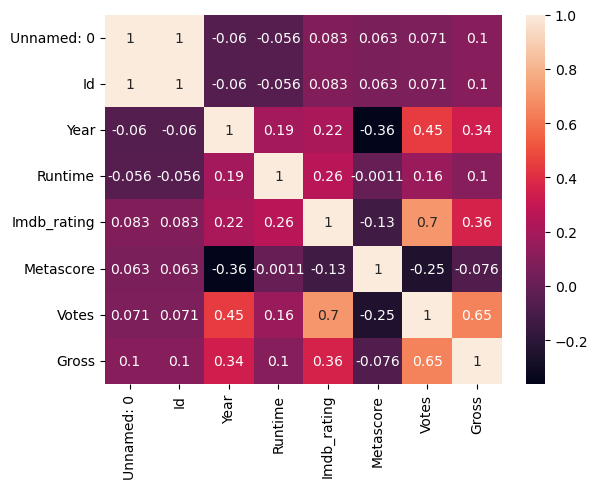

In [134]:
sns.heatmap(MovieData_df.corr(),annot=True)
plt.show()

In [159]:
crosstab1 = pd.crosstab(MovieData_df.Genre,MovieData_df.Certificate)
crosstab1

Certificate,A,Not Rated,U,UA
Genre,,,,
"Action, Adventure",1,0,1,0
"Action, Adventure, Drama",1,0,2,2
"Action, Adventure, Fantasy",0,0,1,1
"Action, Adventure, Mystery",0,0,1,0
"Action, Adventure, Sci-Fi",0,0,1,2
...,...,...,...,...
"Horror, Mystery, Thriller",1,0,0,0
"Horror, Sci-Fi",1,0,0,0
"Mystery, Romance, Thriller",1,0,0,0


<Axes: xlabel='Genre'>

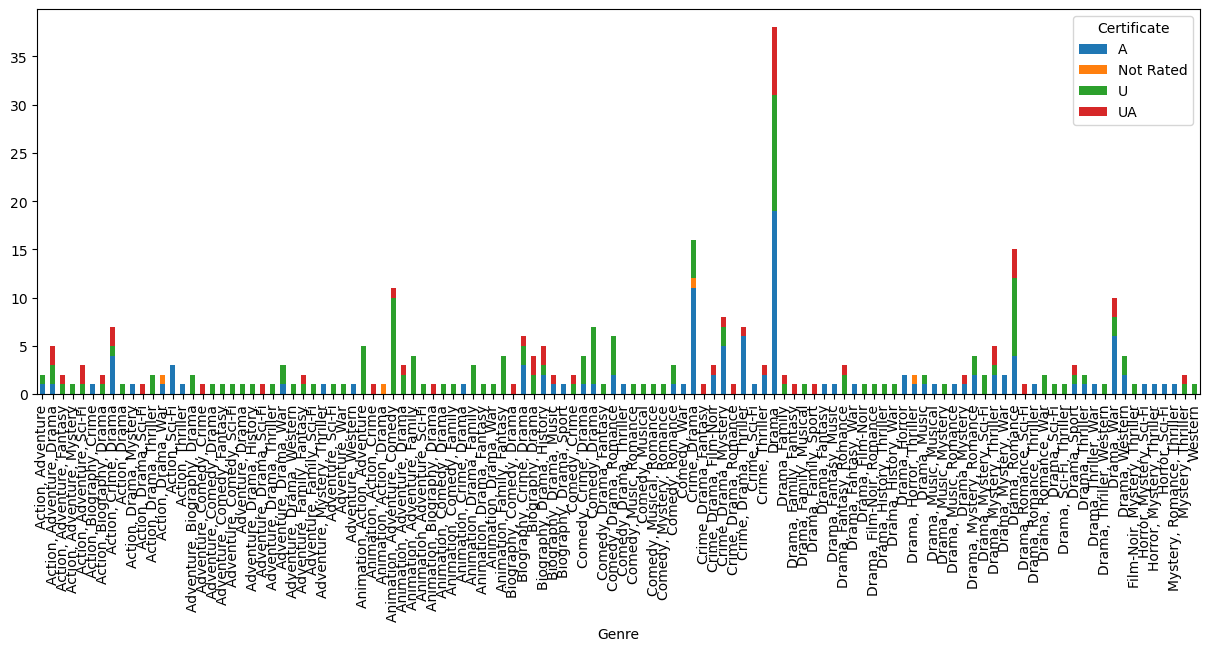

In [161]:
crosstab1.plot(kind='bar',stacked=True, figsize=(15, 5))

Text(0, 0.5, 'Imdb_rating')

Text(0.5, 0, 'Runtime')

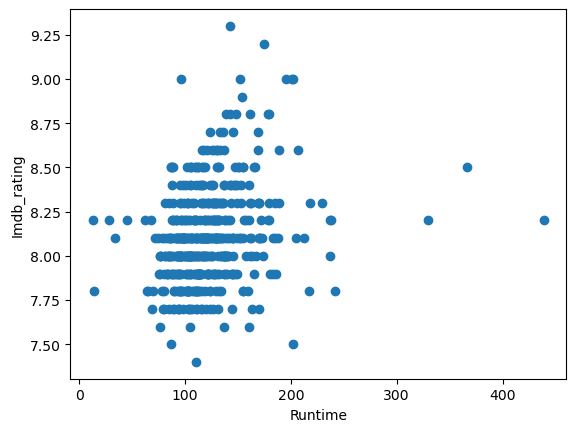

In [192]:
plt.scatter(MovieData_df.Runtime,MovieData_df.Imdb_rating)
plt.ylabel('Imdb_rating')
plt.xlabel('Runtime')

Text(0, 0.5, 'Metascore')

Text(0.5, 0, 'Runtime')

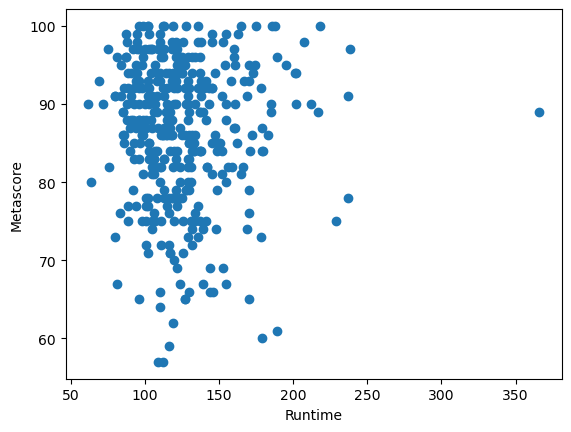

In [193]:
plt.scatter(MovieData_df.Runtime,MovieData_df.Metascore)
plt.ylabel('Metascore')
plt.xlabel('Runtime')

Text(0, 0.5, 'Votes')

Text(0.5, 0, 'Runtime')

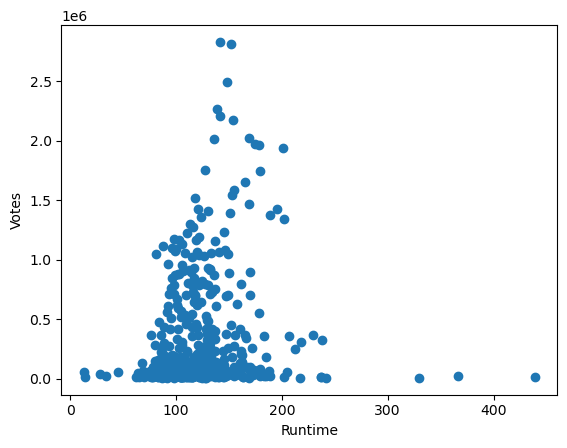

In [194]:
plt.scatter(MovieData_df.Runtime,MovieData_df.Votes)
plt.ylabel('Votes')
plt.xlabel('Runtime')

Text(0, 0.5, 'Gross')

Text(0.5, 0, 'Runtime')

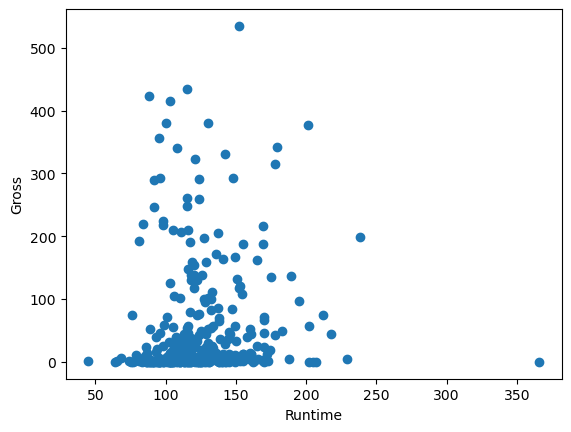

In [195]:
plt.scatter(MovieData_df.Runtime,MovieData_df.Gross)
plt.ylabel('Gross')
plt.xlabel('Runtime')

Text(0, 0.5, 'Metascore')

Text(0.5, 0, 'Imdb_rating')

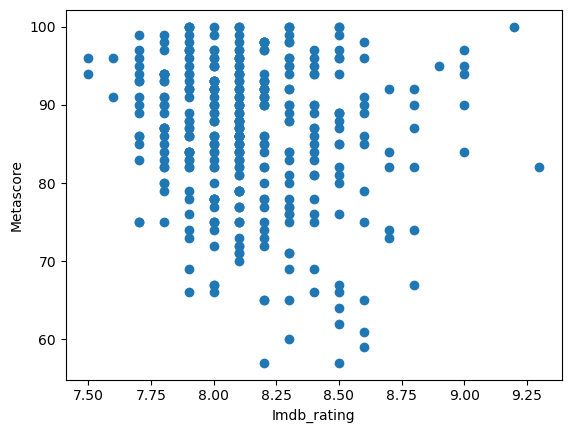

In [196]:
plt.scatter(MovieData_df.Imdb_rating,MovieData_df.Metascore)
plt.ylabel('Metascore')
plt.xlabel('Imdb_rating')

Text(0, 0.5, 'Votes')

Text(0.5, 0, 'Imdb_rating')

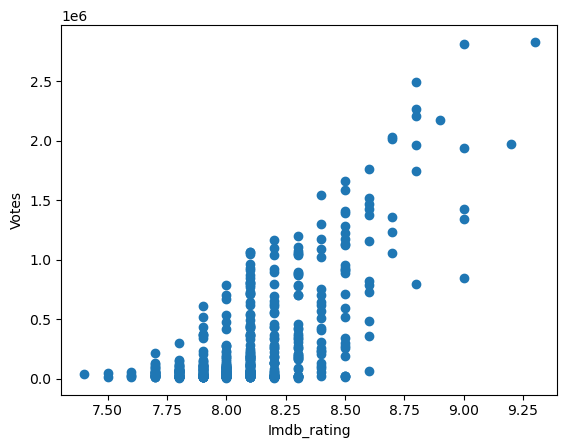

In [197]:
plt.scatter(MovieData_df.Imdb_rating,MovieData_df.Votes)
plt.ylabel('Votes')
plt.xlabel('Imdb_rating')

Text(0, 0.5, 'Gross')

Text(0.5, 0, 'Imdb_rating')

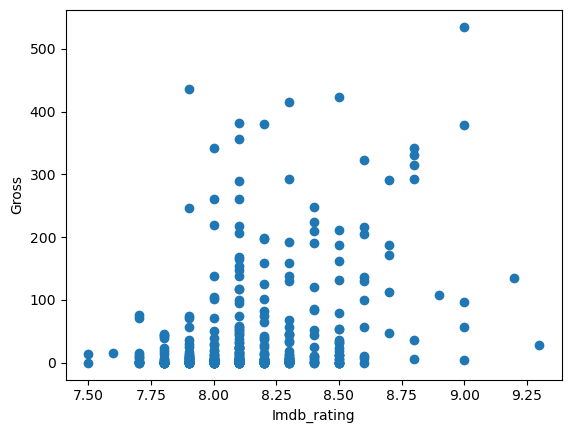

In [198]:
plt.scatter(MovieData_df.Imdb_rating,MovieData_df.Gross)
plt.ylabel('Gross')
plt.xlabel('Imdb_rating')

Text(0, 0.5, 'Imdb_rating')

Text(0.5, 0, 'Metascore')

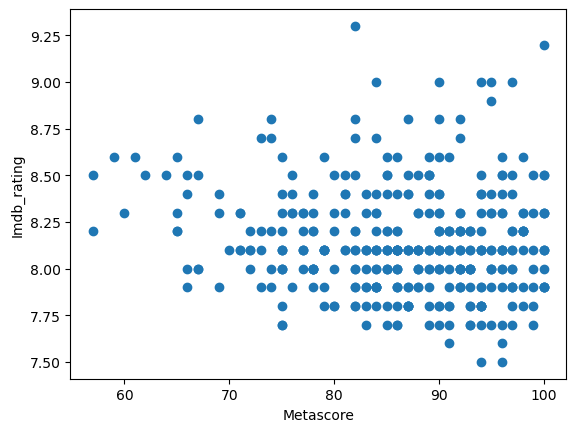

In [199]:
plt.scatter(MovieData_df.Metascore,MovieData_df.Imdb_rating)
plt.ylabel('Imdb_rating')
plt.xlabel('Metascore')

Text(0, 0.5, 'Votes')

Text(0.5, 0, 'Metascore')

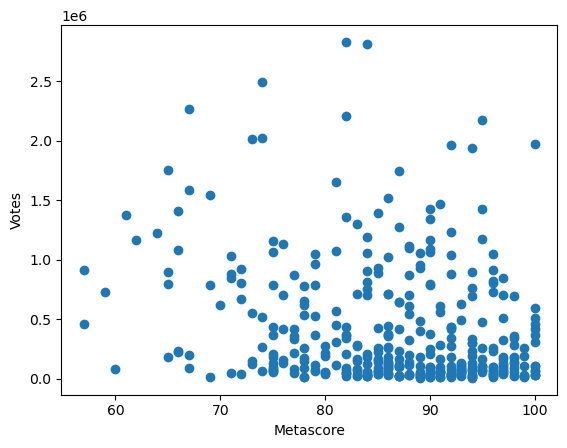

In [200]:
plt.scatter(MovieData_df.Metascore,MovieData_df.Votes)
plt.ylabel('Votes')
plt.xlabel('Metascore')

Text(0, 0.5, 'Gross')

Text(0.5, 0, 'Metascore')

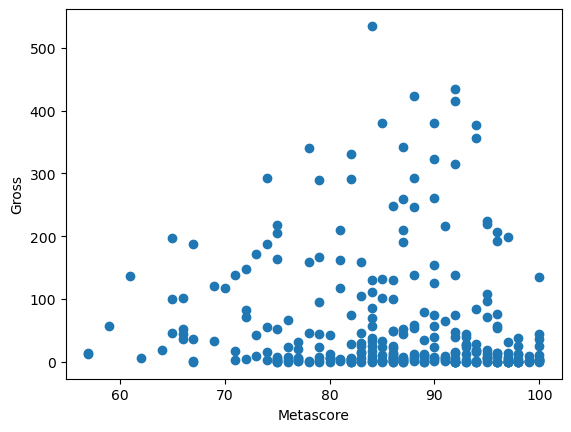

In [201]:
plt.scatter(MovieData_df.Metascore,MovieData_df.Gross)
plt.ylabel('Gross')
plt.xlabel('Metascore')

Text(0, 0.5, 'Gross')

Text(0.5, 0, 'Votes')

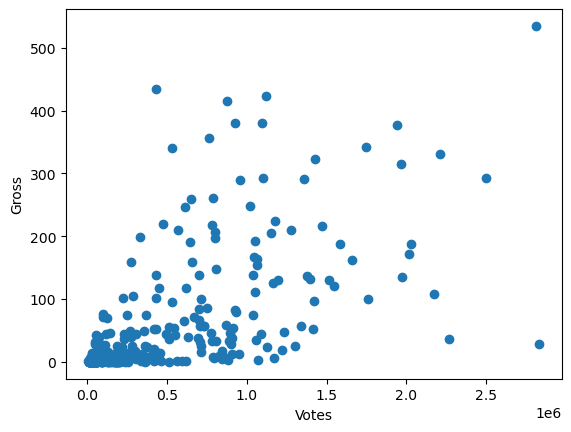

In [202]:
plt.scatter(MovieData_df.Votes,MovieData_df.Gross)
plt.ylabel('Gross')
plt.xlabel('Votes')

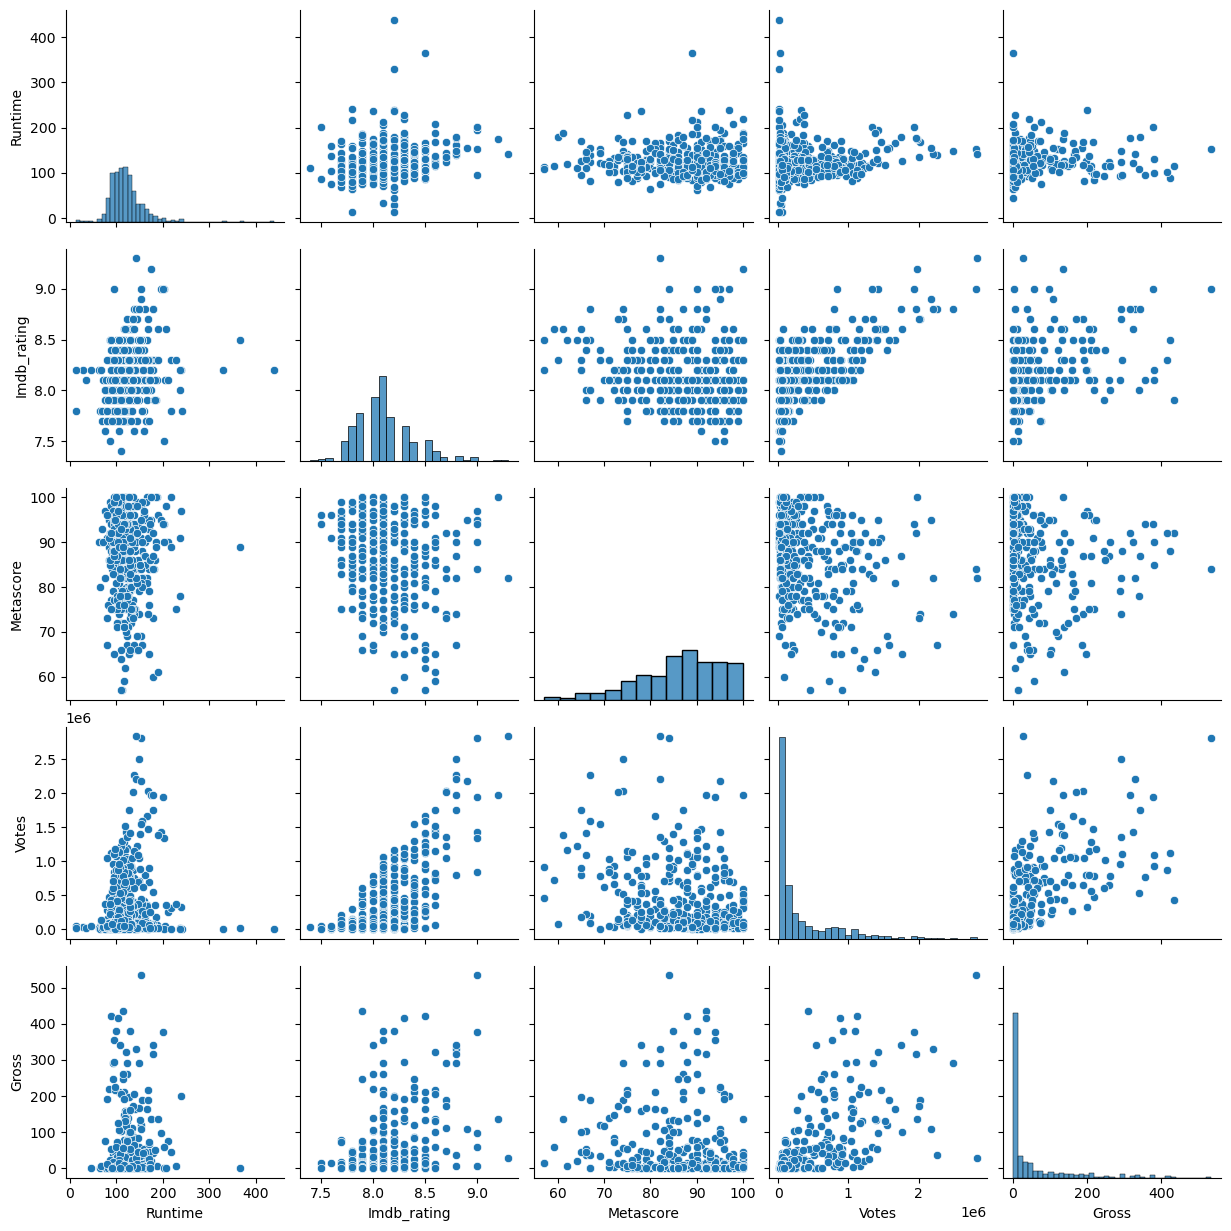

In [205]:
sns.pairplot(data=MovieData_df,vars =['Runtime','Imdb_rating','Metascore','Votes','Gross'])